In [10]:
import sys
sys.path.append('../')

import numpy as np



import os
import matplotlib
import matplotlib.pyplot as plt


import cv2

from scipy import ndimage, fft

import pandas as pd

import scienceplots

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '1000'})

In [11]:
df = pd.read_csv('wandb_export_vgg.csv')

print(df.to_string()) 

   Step  vgg16_5_seed=99 - initial_val_accuracy  vgg16_5_seed=99 - initial_val_accuracy__MIN  vgg16_5_seed=99 - initial_val_accuracy__MAX  vgg16_5_seed=99 - val_accuracy  vgg16_5_seed=99 - val_accuracy__MIN  vgg16_5_seed=99 - val_accuracy__MAX  vgg16_4_seed=99 - initial_val_accuracy  vgg16_4_seed=99 - initial_val_accuracy__MIN  vgg16_4_seed=99 - initial_val_accuracy__MAX  vgg16_4_seed=99 - val_accuracy  vgg16_4_seed=99 - val_accuracy__MIN  vgg16_4_seed=99 - val_accuracy__MAX  vgg16_3_seed=99 - initial_val_accuracy  vgg16_3_seed=99 - initial_val_accuracy__MIN  vgg16_3_seed=99 - initial_val_accuracy__MAX  vgg16_3_seed=99 - val_accuracy  vgg16_3_seed=99 - val_accuracy__MIN  vgg16_3_seed=99 - val_accuracy__MAX  vgg16_1_seed=99_continue - initial_val_accuracy  vgg16_1_seed=99_continue - initial_val_accuracy__MIN  vgg16_1_seed=99_continue - initial_val_accuracy__MAX  vgg16_1_seed=99_continue - val_accuracy  vgg16_1_seed=99_continue - val_accuracy__MIN  vgg16_1_seed=99_continue - val_accuracy

In [12]:
df[f'vgg16_{1}_seed=99 - val_accuracy__MAX'][1:-2].values

array([0.00544174, 0.00974312, 0.01880602, 0.02620839, 0.03032971,
       0.037492  ])

In [13]:
results = {}
for i in range(1,7):	
    
	results[i] = []
	if i == 1:

		results[i].append(df[f'vgg16_{i}_seed=99 - initial_val_accuracy'][0])
		results[i].extend(df[f'vgg16_{i}_seed=99 - val_accuracy__MAX'][1:-2].values)
		results[i].extend(df[f'vgg16_{i}_seed=99_continue - val_accuracy__MAX'][1:3].values)

	else:
		
		results[i].append(df[f'vgg16_{i}_seed=99 - initial_val_accuracy'][0])
		results[i].extend(df[f'vgg16_{i}_seed=99 - val_accuracy__MAX'][1:].values)

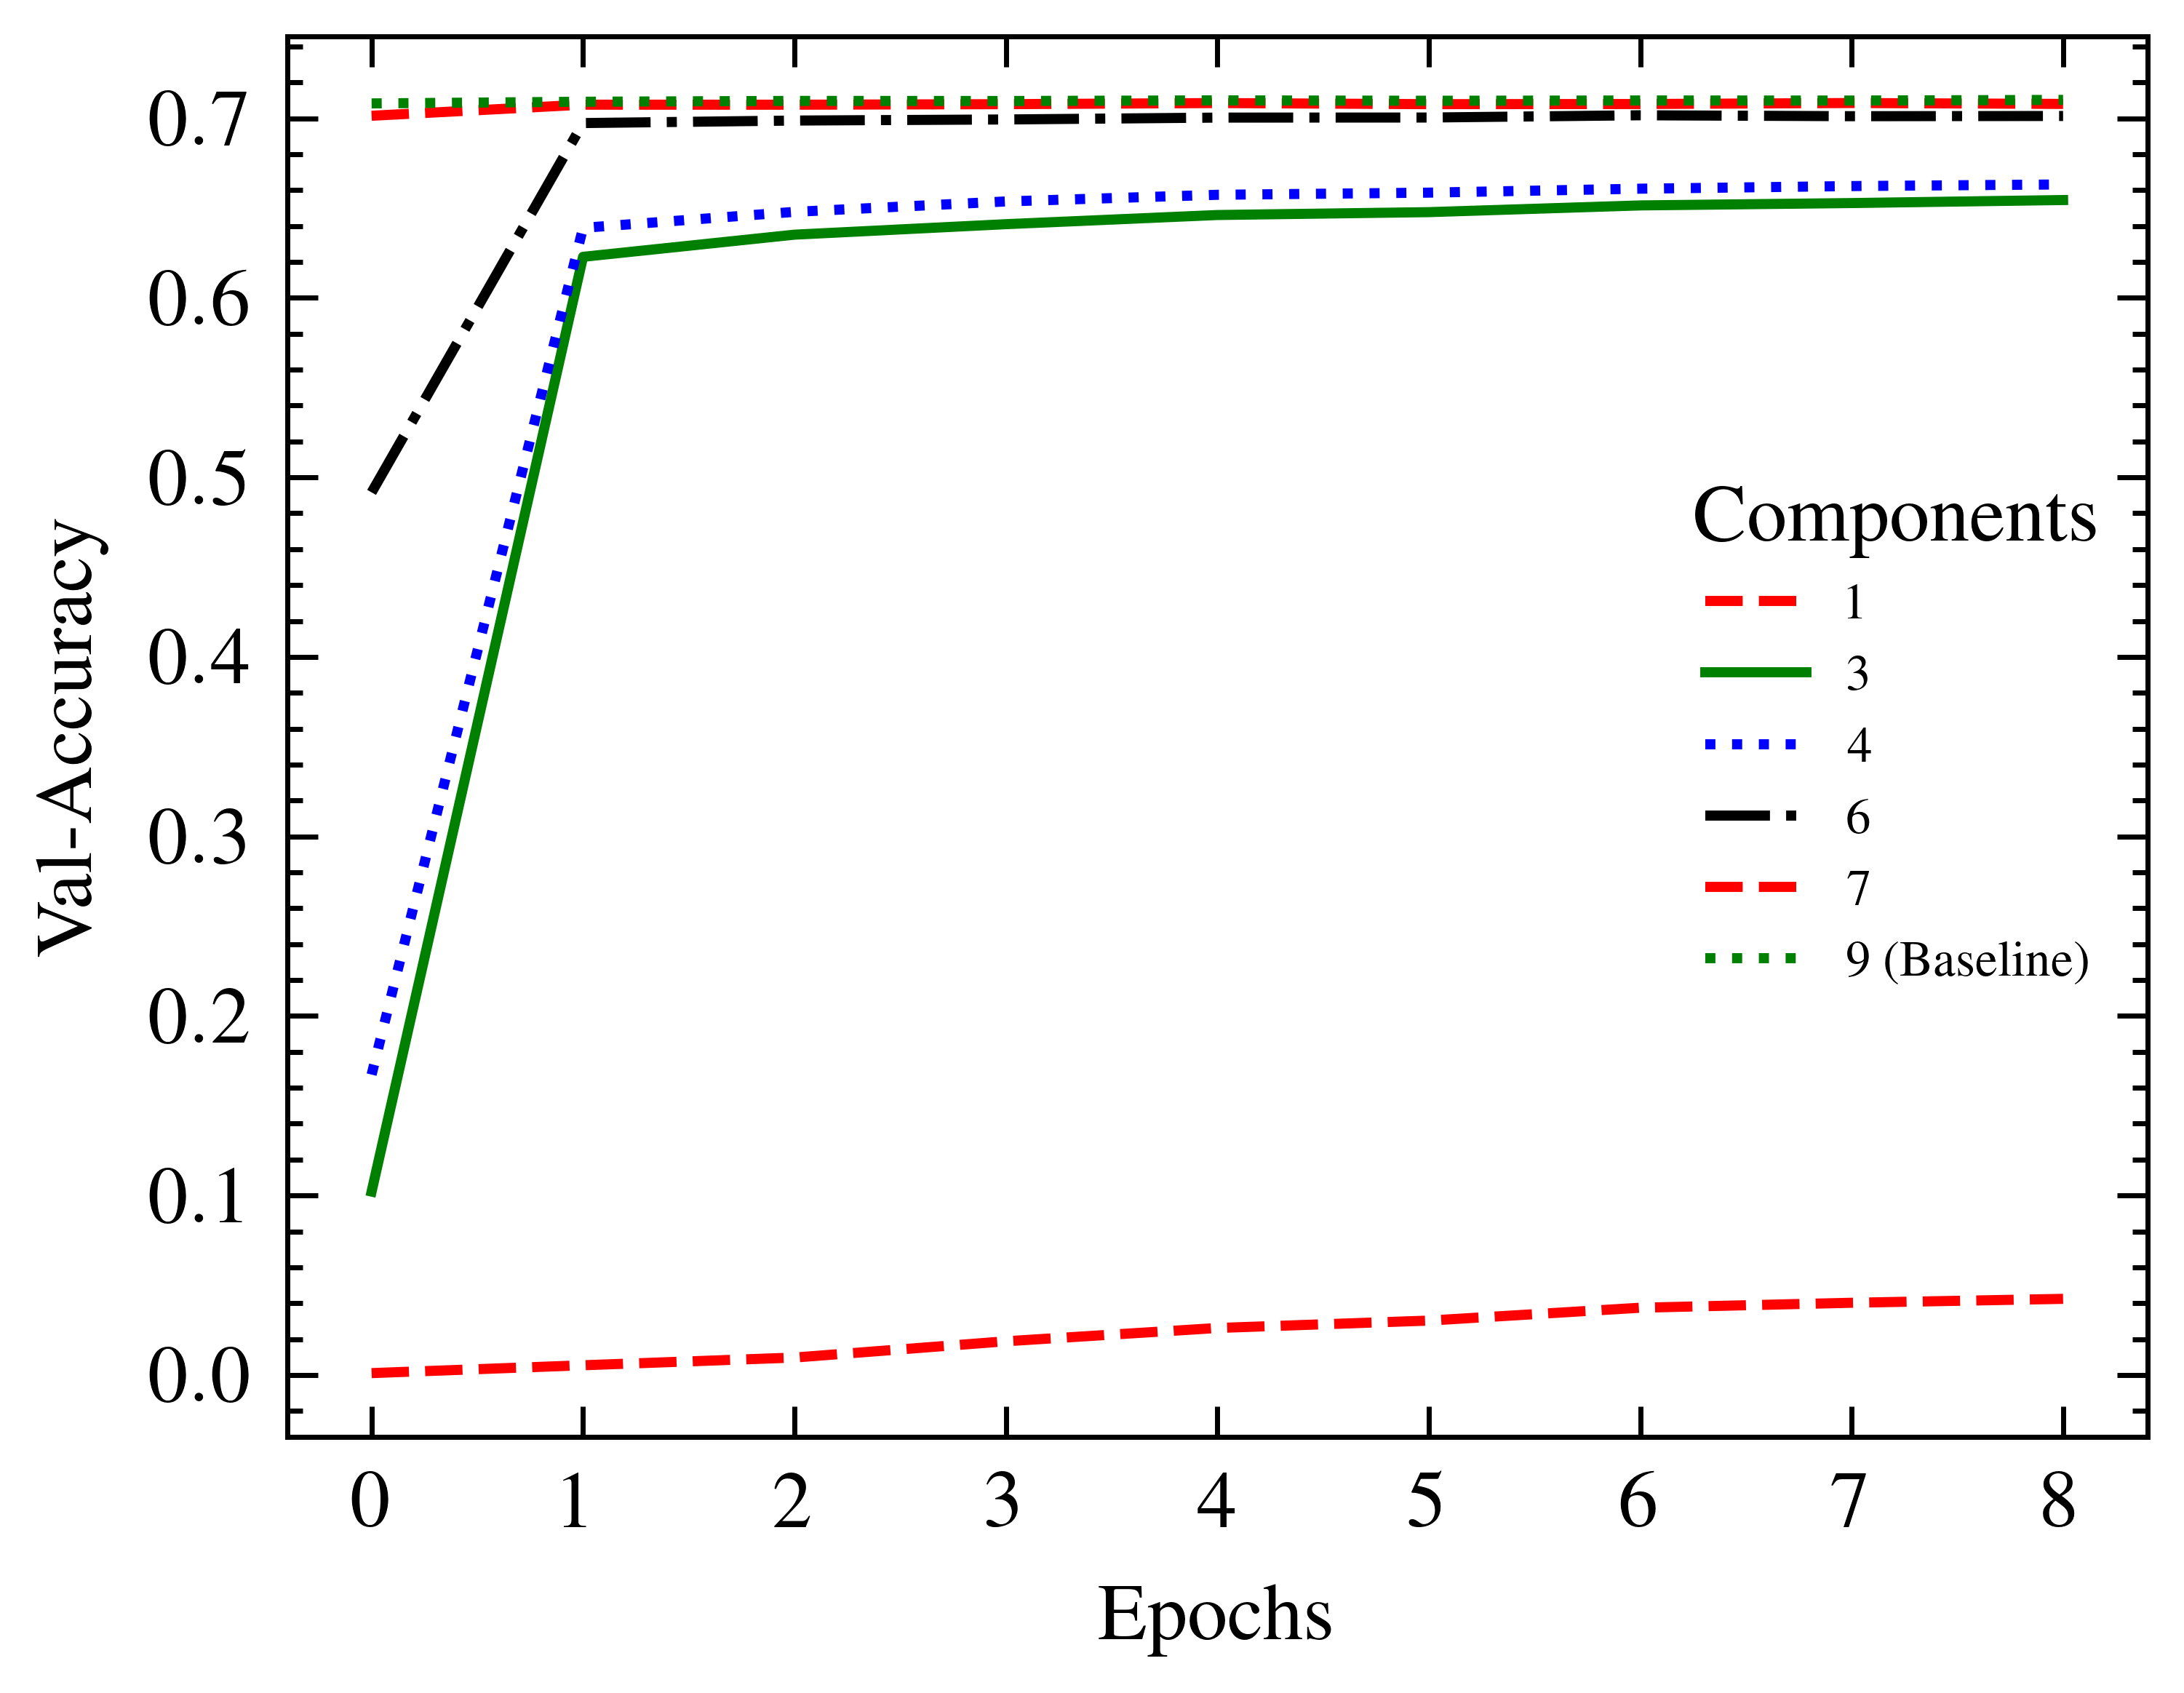

In [16]:
from cycler import cycler

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'k', 'r', 'g']) +
                           cycler('linestyle', ['--', '-', ':', '-.',  '--', ':'])))

xs = range(0, len(results[1]))
markers = ['.', 'v', '^', '<', '>', 's']
f = plt.figure(0) 
for k, v in results.items():  
    ys = v
    plt.plot(xs, ys, label=k, linewidth=1.)

plt.legend(title="Components", labels=['1','3','4','6','7','9 (Baseline)'], facecolor="white", prop = { "size": 5 })
plt.ylabel("Val-Accuracy")
plt.xticks(range(0,len(results[1])))
plt.yticks(np.linspace(0.,0.7, 8))

plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='minor', top=False)

plt.xlabel("Epochs")

plt.show()

In [18]:
pd.DataFrame(results)

,1,2,3,4,5,6
0,0.001080,0.102193,0.167334,0.491617,0.701384,0.708267
1,0.005442,0.622819,0.638964,0.697323,0.707566,0.709207
2,0.009743,0.635163,0.647867,0.698724,0.707546,0.709667
3,0.018806,0.641005,0.653669,0.699324,0.707847,0.709607
4,0.026208,0.646107,0.657370,0.700364,0.708467,0.709967
5,0.030330,0.647707,0.658571,0.700404,0.707847,0.709747
6,0.037492,0.651448,0.660771,0.701665,0.707927,0.709907
7,0.040253,0.652769,0.662232,0.701144,0.708487,0.709867
8,0.042434,0.654449,0.663132,0.701264,0.707987,0.710227


In [ ]:
f.savefig("vgg16_dct.pdf", bbox_inches='tight')
